## Антонов М, БПМ201, вар 2

**7.1.2, 7.3.1, 7.6.1**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [2]:
np.set_printoptions(precision=16, suppress=True) 

## 7.1.2

Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка
и оценить погрешность решения задачи. 

$$y'(t) = f(t,y(t)), t \in [t_0,T],$$
$$y(t_0)=y_0$$

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:

1. Задать исходные данные: функцию $f$ правой части, начальное значение $y_0$.

2. Используя функцию eyler, найти приближенное решение задачи Коши с шагом $h = 0.1$ по явному методу Эйлера.

3. Написать программу для поиска приближенного решения задачи Коши с шагом $h = 0.1$ по методу РунгеКутты $4$ порядка точности 

4. Найти решение задачи Коши аналитически.

5. Построить таблицы значений приближенных и точного решений. На одном чертеже построить графики приближенных и точного решений.

6. Оценить погрешность приближенных решений двумя способами: 

    а) по формуле $ \varepsilon = \underset{0\leq i\leq N}{ max}  |y(t_i) - y_i|$; здесь $y(t_i)$ и $y_i$ - значения точного и приближенного решений в узлах сетки $t_i = 1,...N$
    
 
    b) по правилу Рунге (по правилу двойного пересчета) 
     
7. Выяснить, при каком значении шага $h=h^*$ решение, полученное по методу Эйлера, будет иметь такую же погрешность (см. п. 6а), как решение, полученное с помощью метода Рунге-Кутты с шагом . 

УКАЗАНИЕ. В п. 7 рекомендуется провести серию вычислений решения по методу Эйлера, дробя шаг пополам.

### 1) Задание функции f

Условия **7.1.2**:

$$y  ctg(t) + 2 t sin(t)$$
$$t_0 = \frac{\Pi}{2}$$ 
$$T=\frac{\Pi}{2}+1$$
$$y_0=0$$

где:

$t_0$ - начало отрезка 

$T$ - конец отрезка

$y_0$ - начальное решение з.Коши

$h$ - шаг сетки

$N$ - число узлов сетки

In [3]:
t0 = np.pi/2 
T = np.pi/2 + 1 
y0 = 0
h = 0.1 

def func_1(t, y): 
    return y * np.cos(t)/np.sin(t) + 2 * t * np.sin(t) 

In [4]:
column = ['type']
column += [t0 + i * h for i in range(int((T - t0)/h)+1)]
results = pd.DataFrame(columns=column)

### 2) Метод Эйлера 

In [5]:
def Eyler(func, t0, T, y0, h): 
    n = int((T - t0)/h)
    y = [y0]
    for i in range(n):
        y.append(y[i] + h*func(t0 + i*h, y[i]))
    return np.array(y)

In [6]:
y_eyler = Eyler(func_1, t0, T, y0, h) 
print(f't_0 = {t0}, T = {T}, y_0 = {y0}, h = {h}')
print('y:')
print(f'len = {len(y_eyler)}')
print(*list(y_eyler),sep='\n')
results.loc[len(results)] = ['eyler'] + list(y_eyler)

t_0 = 1.5707963267948966, T = 2.5707963267948966, y_0 = 0, h = 0.1
y:
len = 11
0.0
0.3141592653589793
0.6434970195701689
0.9775523484126326
1.3047611096289915
1.6126414194535383
1.888001366310637
2.1171633476651732
2.2861973048297823
2.3811515568967696
2.388263111991595


### 3) Рунге-Кутты

In [7]:
def Runge_Kutta_4_one_step(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + h*0.5, y + h*0.5*k1)
    k3 = f(t + h*0.5, y + h*0.5*k2)
    k4 = f(t + h, y + h*k3)
    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

def Runge_Kutta_4(f, t,T, y, h):
    n = int((T - t0)/h)
    t_list = [t0 + i * h for i in range(n)]
    y_list = [y]
    for i in range(n):
        y_list.append(Runge_Kutta_4_one_step(f, t_list[i] ,y_list[i], h))
    return np.array(y_list)

In [8]:
y_Runge_Kutta = Runge_Kutta_4(func_1, t0, T, y0, h) 
print(f't_0 = {t0}, T = {T}, y_0 = {y0}, h = {h}')
print('y:')
print(f'len = {len(y_Runge_Kutta)}')
print(*list(y_Runge_Kutta),sep='\n')
results.loc[len(results)] = ['Runge_Kutta'] + list(y_Runge_Kutta)

t_0 = 1.5707963267948966, T = 2.5707963267948966, y_0 = 0, h = 0.1
y:
len = 11
0.0
0.32253952769394817
0.6549960196097516
0.98636265224781
1.3048075298852633
1.5978967492468317
1.8528383858569075
2.0567434854342004
2.1968997546468456
2.261053300892874
2.2376934360035023


### 4) Аналитическое решение

$\begin{equation*}
 \begin{cases}
   y' =y  ctg(t) + 2 t sin(t) \\&t \in [\frac{\Pi}{2},\frac{\Pi}{2}+1]\\
   y(\frac{\Pi}{2}) = 0
 \end{cases}
\end{equation*}$

Линейноне однородное:

1) $y' - y ctg(t) = 0$

$$\frac{dy}{dt} = y ctg(t)$$

$$\frac{dy}{y} =  ctg(t) dt$$

$$\Rightarrow y = sin(t) C_2$$

2) $y = sin(t) C_2(t)$

$$cos(t)C_2(t) + sin(t) C_2'(t) = sin(t) C_2(t) ctg(t) + 2 t sin(t)$$

$$sin(t) C_2'(t) =  2 t sin(t)$$

$$C_2'(t) = \frac{2 t sin(t)}{sin(t)} = 2 t$$

$$C_2(t) = t^2+C_3$$

$$\Rightarrow y = sin(t) (t^2+C_3)$$

3) З.Коши

$$y(\frac{\Pi}{2}) = sin(\frac{\Pi}{2})(\frac{\Pi^2}{4}+C_3)=0$$

$$\Rightarrow C_3 = - \frac{\Pi^2}{4}$$

4) Ответ:

$$y = sin(t)(t^2-\frac{\Pi^2}{4})$$

In [9]:
def anal_func_1(t):
    return np.sin(t)*(t**2 - np.pi**2 /4)

def Analit(f, t, T, h):
    N = int((T - t0)/h)
    t_list = np.array([t + i * h for i in range(N+1)])
    y_anal = f(t_list)
    return np.array(y_anal)

In [10]:
y_anal = Analit(anal_func_1, t0,T, h)
print(f't_0 = {t0}, T = {T}, y_0 = {y0}, h = {h}')
print('y:')
print(f'len = {len(y_anal)}')
print(*list(y_anal),sep='\n')
results.loc[len(results)] = ['analytical'] + list(y_anal)

t_0 = 1.5707963267948966, T = 2.5707963267948966, y_0 = 0, h = 0.1
y:
len = 11
0.0
0.32253981924564945
0.654996655308636
0.9863637128042856
1.304809139947492
1.5978991051492457
1.8528418040952404
2.0567484894793484
2.196907237815605
2.261064853044812
2.237712060701113


In [11]:
results.set_index('type',inplace=True)
results

,1.5707963267948966,1.6707963267948966,1.7707963267948965,1.8707963267948966,1.9707963267948965,2.0707963267948966,2.1707963267948966,2.2707963267948967,2.3707963267948964,2.4707963267948965,2.5707963267948966
type,,,,,,,,,,,
eyler,0.0,0.314159,0.643497,0.977552,1.304761,1.612641,1.888001,2.117163,2.286197,2.381152,2.388263
Runge_Kutta,0.0,0.322540,0.654996,0.986363,1.304808,1.597897,1.852838,2.056743,2.196900,2.261053,2.237693
analytical,0.0,0.322540,0.654997,0.986364,1.304809,1.597899,1.852842,2.056748,2.196907,2.261065,2.237712


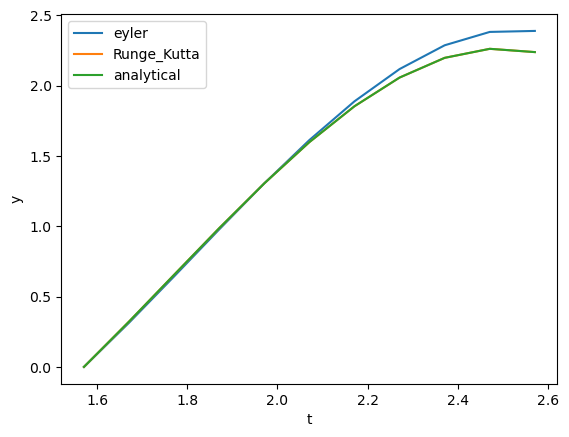

In [12]:
for index in results.index:
    plt.plot([t0 + i * h for i in range(int((T - t0)/h)+1)], results.loc[index],label=index)
    
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Графики Аналитического решения и Рунге-Кутта совпали

### 6) Оценить погрешность

$ \varepsilon = \underset{0\leq i\leq N} max  |y(t_i) - y_i|$

In [13]:
def Epsilon(x,y):
    return max(abs(x - y))

In [14]:
print(f'eyler: E = {Epsilon(y_eyler, y_anal)}')
print(f'Runge-Kutta: E = {Epsilon(y_Runge_Kutta, y_anal)}')

eyler: E = 0.15055105129048174
Runge-Kutta: E = 1.862469761082508e-05


Погрешность метода Эйлера больше чем Рунге-Кутта

**Двойной пересчет**

Правило рунге:
$$y(t_i)-y_i^{h/2} \approx \varepsilon_i^h$$, где $$\varepsilon_i^h = \frac{y_i^{h/2} - y(t_i)}{2^p-1}$$

In [15]:
def runge_rule(x, y,p=1):
    return (y[::2]- x)/(2**(p)-1)

def Epsilon_2(x,y,p=1):
    return max(abs(runge_rule(x,y,p=p)))

In [16]:
y_eyler_2 = Eyler(func_1, t0, T, y0, h/2)
print(f'Eyler: E = {Epsilon_2(y_eyler, y_eyler_2, p = 1) }')
y_Runge_Kutta_2 = Runge_Kutta_4(func_1, t0, T, y0, h/2)
print(f'Runge-Kutta: E = {Epsilon_2(y_Runge_Kutta, y_Runge_Kutta_2,p=4) }')

Eyler: E = 0.07581489139051101
Runge-Kutta: E = 1.1669151422921686e-06


Погрешность метода Эйлера больше чем Рунге-Кутта

### 7) найти h*

Epsilon Euler start = 0.15055105129048174
Epsilon Runge-Kutta = 1.862469761082508e-05
0.07473615989997073
0.03721109648899512
0.01856391045004635
0.009271269108357849
0.004632929796372309
0.0023157846385282177
0.0011577217507379167
0.0005788181706134488
0.00028939840131014805
0.0001446965286691082
7.234759621965736e-05
3.617363106167559e-05
1.8086773792003186e-05


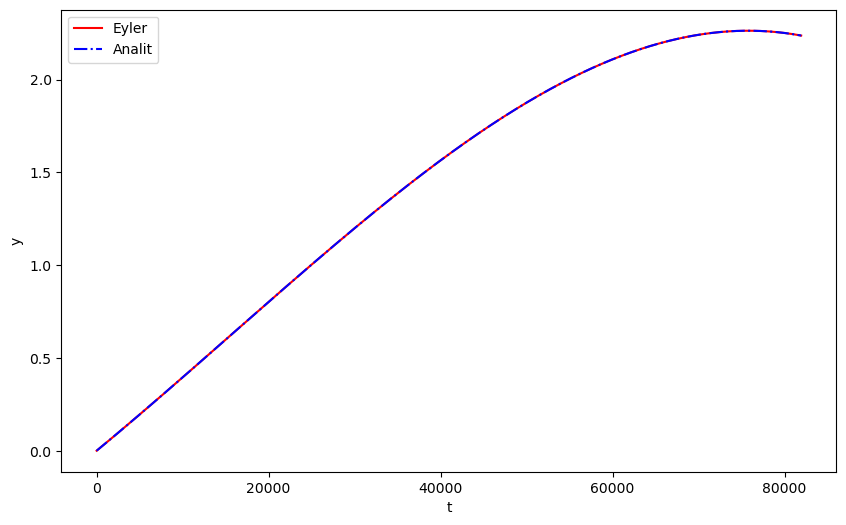

При значении шага  1.220703125e-05
Количество итераций  13


In [17]:
h_new = h
ep_eyler = Epsilon(y_eyler, y_anal)
ep_Runge_Kutta = Epsilon(y_Runge_Kutta, y_anal) 
print(f'Epsilon Euler start = {ep_eyler}')
print(f'Epsilon Runge-Kutta = {ep_Runge_Kutta}')
count_it = 0
while ep_eyler >= ep_Runge_Kutta and count_it < 100:
    count_it+=1
    h_new = h_new/2
    ep_eyler = Epsilon(Eyler(func_1,t0,T, y0, h_new), Analit(anal_func_1, t0,T, h_new)) 
    print(ep_eyler)
plt.figure(figsize=(10, 6))
plt.plot( Eyler(func_1,t0,T, y0, h_new),label='Eyler',color='r')
plt.plot( Analit(anal_func_1, t0, T, h_new),label='Analit',linestyle='-.',color='b')
    
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()
print("При значении шага ", h_new)
print("Количество итераций ", count_it)

___

**Вывод:**
    
В данном задании проводилось сравнение методов Эйлера и Рунге-Кутта на примере уравнения:
    
$$\begin{equation*}
 \begin{cases}
   y' =y  ctg(t) + 2 t sin(t) \\&t \in [\frac{\Pi}{2},\frac{\Pi}{2}+1]\\
   y(\frac{\Pi}{2}) = 0
 \end{cases}
\end{equation*}$$
    
Для этого оно было решено:
    
$$y = sin(t)(t^2-\frac{\Pi^2}{4})$$
    
Метод Рунге-Кутта показал меньшую погрешность по формуле $ \varepsilon = \underset{0\leq i\leq N} max  |y(t_i) - y_i|$, также методом двойного пересчета.
    
Для того, чтобы погрешность метода Эйлера была меньше чем Рунге-Кутта, h должно быть равно 1.220703125e-05
    

## 7.3.1

Решить приближенно задачу Коши для ОДУ 1 порядка вида: $$y'(t) = f(t,y(t)), t \in [t_0,T],$$
$$y(t_0)=y_0$$

, используя метод Рунге-Кутты 4
порядка точности и метод, указанный в варианте, с шагами
$h$
и
$\frac{h}{2}$
. Для каждого метода оценить
погрешность по правилу Рунге и вычислить уточненное решение. Построить на
одном чертеже графики приближенных решений (с шагом h / 2) и графики уточненных решений.


Задание:

$$-ty+(1+t)e^{-t}y^2$$
$$t0 = 0$$
$$T = 1$$
$$y0 = 1$$
Метод: **Рунге-Кутты 3 порядка I**

In [18]:
t0 = 0
T = 1
y0 = 1
h = 0.1

Функция по заданию

In [19]:
def func_2(t,y):
    return -t*y+(1+t)*np.exp(-t)*y**2

метод Рунге-Кутта 3 порядка I

In [20]:
def Runge_Kutta3_1_one_step(f, t, y, h):
    k1 = h*f(t, y)
    k2 = h*f(t + h*0.5, y + 0.5*k1)
    k3 = h*f(t + h, y-k1 + 2*k2)
    return y + (k1 + 4*k2 + k3)/6

def Runge_Kutta3_1(f, t, T, y, h):
    N = int((T-t)/h)
    t_list = [t + i * h for i in range(N)]
    y_list = [y]
    for i in range(N):
        y_list.append(Runge_Kutta3_1_one_step(f, t_list[i] ,y_list[i], h))
    return np.array(y_list)

Находим значения методами Рунге-Кутта 4 порядка и Рунге-Кутта 3 порядка I

In [21]:
Runge_Kutta_4_h = Runge_Kutta_4(func_2,t0,T,y0,h)
Runge_Kutta_4_h2 = Runge_Kutta_4(func_2,t0,T,y0,h/2)
Runge_Kutta_3_1_h = Runge_Kutta3_1(func_2,t0,T,y0,h)
Runge_Kutta_3_1_h2 = Runge_Kutta3_1(func_2,t0,T,y0,h/2)

Находим погрешности по правилу Рунге

In [22]:
ep_runge_4 = Epsilon_2(Runge_Kutta_4_h,Runge_Kutta_4_h2,p=4)
ep_runge_3_1 = Epsilon_2(Runge_Kutta_3_1_h,Runge_Kutta_3_1_h2,p=3)

print('Погрешность по правилу Рунге:')
print(f'Runge-Kutta 4 = {ep_runge_4}')
print(f'Runge-Kutta 3_1 = {ep_runge_3_1}')

Погрешность по правилу Рунге:
Runge-Kutta 4 = 3.533076388902619e-06
Runge-Kutta 3_1 = 0.00014258520422532378


Находим уточнение решение используя погрешность из правила Рунге

/var/folders/bs/dggk1c6d42gcjhstkr9c_wp00000gn/T/ipykernel_52543/503980465.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([t0 + i * h/2 for i in range(int((T-t0)/(h/2))+1)],
/var/folders/bs/dggk1c6d42gcjhstkr9c_wp00000gn/T/ipykernel_52543/503980465.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([t0 + i * h for i in range(int((T-t0)/h)+1)],


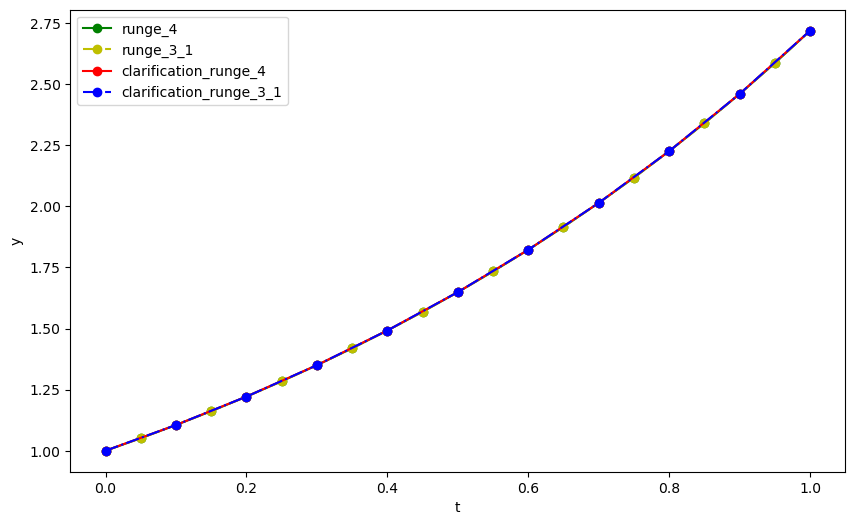

In [23]:
clarification_runge_4 = Runge_Kutta_4_h2[::2] + runge_rule(Runge_Kutta_4_h, Runge_Kutta_4_h2,p=4)
clarification_runge_3_1 = Runge_Kutta_3_1_h2[::2] + runge_rule(Runge_Kutta_3_1_h, Runge_Kutta_3_1_h2,p=3)

plt.figure(figsize=(10, 6))
plt.plot([t0 + i * h/2 for i in range(int((T-t0)/(h/2))+1)],
         Runge_Kutta_4_h2,'-o',label='runge_4',color='g')
plt.plot([t0 + i * h/2 for i in range(int((T-t0)/(h/2))+1)], 
         Runge_Kutta_3_1_h2,'-o',label='runge_3_1',linestyle='-.',color='y')
plt.plot([t0 + i * h for i in range(int((T-t0)/h)+1)], 
         clarification_runge_4,'-o',label='clarification_runge_4',color='r')
plt.plot([t0 + i * h for i in range(int((T-t0)/h)+1)], 
         clarification_runge_3_1,'-o',label='clarification_runge_3_1',linestyle='-.',color='b')

    
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Графики совпали.

Для наглядности посмотрим на разницу

In [24]:
print(f'runge_3_1_h2, runge_4_h2')
for i,j in zip(Runge_Kutta_3_1_h2, Runge_Kutta_4_h2):
    print(f'{i}, {j}, difference = {abs(i-j)}')

runge_3_1_h2, runge_4_h2
1.0, 1.0, difference = 0.0
1.0512702832295, 1.0512710812116743, difference = 7.97982174338685e-07
1.1051691049784538, 1.1051708836720207, difference = 1.778693566878431e-06
1.1618312080653945, 1.1618341841541924, difference = 2.976088797845833e-06
1.2213982391536728, 1.2214026694611237, difference = 4.430307450897786e-06
1.284019101842274, 1.2840252906862442, difference = 6.188843970189595e-06
1.34985032768133, 1.3498586356325886, difference = 8.307951258501589e-06
1.4190564659928568, 1.4190673203202409, difference = 1.0854327384013374e-05
1.49181049341367, 1.4918244005594785, difference = 1.39071458085116e-05
1.5682942441136472, 1.5683118046168059, difference = 1.756050315870894e-05
1.6486988616779874, 1.6487207880533483, difference = 2.1926375360914463e-05
1.7332252736761868, 1.733252411869974, difference = 2.71381937870796e-05
1.8220846899722134, 1.8221180451510868, difference = 3.335517887337325e-05
1.9154991258586727, 1.9155398934594405, difference = 4.076

In [25]:
print(f'clarification_runge_3_1, clarification_runge_4')
for i,j in zip(clarification_runge_3_1,clarification_runge_4):
    print(f'{i}, {j}, difference = {abs(i-j)}')

clarification_runge_3_1, clarification_runge_4
1.0, 1.0, difference = 0.0
1.1051707850151125, 1.1051709163177659, difference = 1.3130265341665392e-07
1.2214024189117805, 1.2214027534311958, difference = 3.345194152792885e-07
1.3498581571072636, 1.3498587980403685, difference = 6.409331048118361e-07
1.491823585524379, 1.4918246805532043, difference = 1.095028825170985e-06
1.6487194817085762, 1.6487212419848525, difference = 1.7602762762969348e-06
1.8221160264240452, 1.8221187540331245, difference = 2.727609079267168e-06
2.013748506669967, 2.013752634620967, difference = 4.127951000132413e-06
2.225534665284384, 2.225540816149263, difference = 6.150864878762263e-06
2.459593867675342, 2.4596029402210267, difference = 9.072545684496447e-06
2.7182682726356915, 2.718281570841825, difference = 1.3298206133605106e-05


    
**Вывод:**
    
В данном задании проводилось сравнение методов Рунге-Кутта 4 порядка и Рунге-Кутта 3 порядка I на примере уравнения:
    
$$\begin{equation*}
 \begin{cases}
   y' = -ty+(1+t)e^{-t}y^2 \\&t \in [0,1]\\
   y(0) = 1
 \end{cases}
\end{equation*}$$
    
    
Погрешности по правилу Рунге:
    
- Runge-Kutta 4 = 3.533076388902619e-06
    
- Runge-Kutta 3_1 = 0.00014258520422532378
    
После были получены уточненные решения с помощью правила рунге.
    
На графике уточненные решения совпали.
    

### 7.6.1

Даны две задачи Коши для систем ОДУ 1 порядка с постоянными коэффициентами на отрезке
$[0, 1]$:
 $$Y'(t) = AY(t), Y(0) = Y_0$$
 $$Z'(t) = BZ(t), Z(0) = Z_0$$
где $A$ и $B$ – заданные матрицы,
$Y_0, Z_0$, - заданные векторы. Выяснить, какая из задач является жесткой.

 ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
 
1. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по явному методу Эйлера. Используя составленную программу, решить обе задачи с шагом $h=0.01$. Определить, для какой из задач явный метод неустойчив при данном шаге h.
2. Используя встроенную функцию eigenvals(M) (M – матрица) для нахождения собственных чисел матриц A и B, найти коэффициенты жесткости обеих систем. Какая из задач является жесткой?
3. Для жесткой задачи теоретически оценить шаг $h^*$, при котором явный метод Эйлера будет устойчив
4. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по неявному методу Эйлера. Используя составленную программу, найти решение жесткой задачи с шагом h=0.01. Построить графики компонент полученного решения.
5. Для жесткой задачи экспериментально подобрать шаг h, при котором графики компонент решения, полученного по явному методу Эйлера, визуально совпадают с графиками компонент решения, полученного по неявному методу с шагом h=0.01. Сравнить найденное значение шага с шагом h*. Объяснить различие поведения явного и неявного методов Эйлера при решении жесткой задачи.

УКАЗАНИЕ. В п. 4 для решения системы линейных уравнений удобно использовать встроенную функцию
lsolve пакета MATHCAD.

Задание:

$$A =
\begin{bmatrix}
   -1.999& -0.019  \\
   -0.063 & -1.051  \\
\end{bmatrix},
$$
$$
Y_0 =
\begin{bmatrix}
  0  \\
  1 \\
\end{bmatrix},
$$

$$B =
\begin{bmatrix}
   -10.85& 9.787  \\
   32.515 & -499.55  \\
\end{bmatrix},
$$
$$
Z_0 =
\begin{bmatrix}
  1  \\
  0 \\
\end{bmatrix},
$$

Зададим матрицы из задания

In [26]:
A = np.array([[-1.999, -0.019], [-0.063, -1.051]]) 
y0 = np.array([0, 1])
B = np.array([[-10.850, 9.787], [32.515, -499.55]]) 
z0 = np.array([1, 0])

Зададим условия задачи

In [27]:
t0 = 0.
T = 1.
h = 0.01

### 1) Явный метод Эйлера

Реализуем явный метод Эйлера

In [28]:
def Eyler_matrix(A, y0, t0, T, h): 
    N = int((T - t0) / h)
    y = [y0]
    for i in range(N):
        y.append(y[-1] + h * np.dot(A, y[-1]))
    return np.array(y)

Находим решение явным методом Эйлера

In [29]:
solution_A = Eyler_matrix(A, y0, t0, T, h) 
solution_B = Eyler_matrix(B, z0, t0, T, h)

Определим устойчивость метода с помощью собственных значений матриц

$$h \leq \frac{2}{\underset{i}{max}|Re\lambda_i|}$$

In [30]:
eigenvalues_A, eigenvector_A = np.linalg.eig(A)
eigenvalues_B, eigenvector_B = np.linalg.eig(B)
max_h_A = 2 / np.max(np.abs(eigenvalues_A))
max_h_B = 2 / np.max(np.abs(eigenvalues_B))
print(f'Максимальное h для А = {max_h_A}, используемое h = {h}, метод {"не " if max_h_A < h else ""}устойчив')
print(f'Максимальное h для B = {max_h_B}, используемое h = {h}, метод {"НЕ " if max_h_B < h else ""}устойчив')

Максимальное h для А = 0.9998695265576716, используемое h = 0.01, метод устойчив
Максимальное h для B = 0.003998398244846978, используемое h = 0.01, метод НЕ устойчив


### 2) Найдем жесткость 

Жесткость системы определяется:

Пусть $Re\lambda_k < 0$, тогда число жесткости системы
$$s = \frac{max|Re\lambda_k|}{min|Re\lambda_k|}$$
Ситема устойчива если $$s >> 1$$

In [31]:
print(f'Число жесткости S для А = {max(abs(eigenvalues_A))/min(abs(eigenvalues_A)) }')
print(f'Число жесткости S для B = {max(abs(eigenvalues_B))/min(abs(eigenvalues_B)) }')

Число жесткости S для А = 1.9054840723352096
Число жесткости S для B = 49.04068551787617


Система B - жесткая

### 3) При каком h* явный метод Эйлера для системы "B" будет устойчив

см.п. 1

In [32]:
print(f'Метод для системы B будет устойчивым при h <= {max_h_B}')

Метод для системы B будет устойчивым при h <= 0.003998398244846978


### 4) Неявный метод Эйлера для жесткой задачи

Неявный метод Эйлера

In [33]:
def implicit_euler(A, y0, t0, T, h):
    N = int((T - t0) / h)
    y = [y0]
    for i in range(N):
        def equation(y_next):
            return y[-1] + h*np.dot(A, y_next) - y_next
        y.append(fsolve(equation, y[-1]))
    return np.array(y)

In [34]:
t_list = [t0 + i * h for i in range(int((T-t0)/h)+1)]
impl_solution_B = implicit_euler(B, z0, t0, T, h)

Построим графики

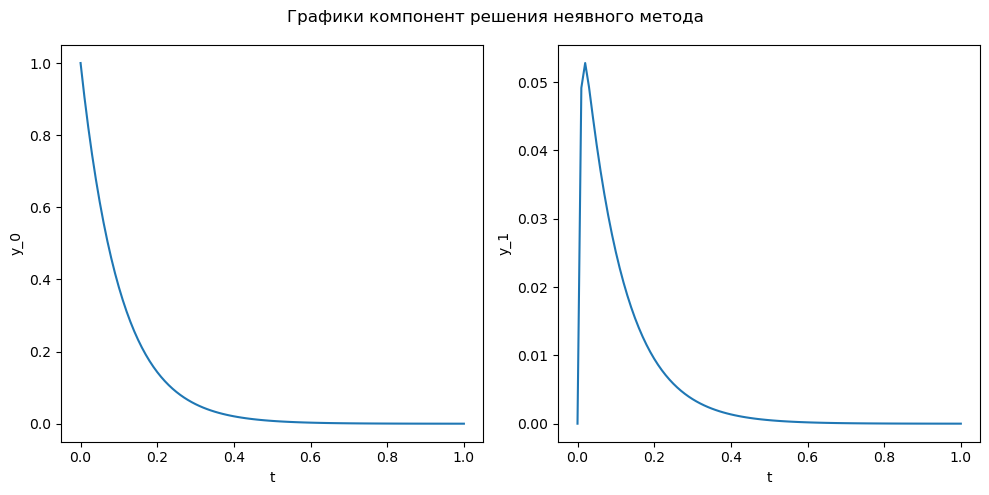

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)  
plt.plot(t_list, impl_solution_B[:, 0],label='Первая компонента решения') 
plt.xlabel('t')
plt.ylabel('y_0')
plt.subplot(1, 2, 2)
plt.plot(t_list, impl_solution_B[:, 1],label='Вторая компонента решения') 
plt.xlabel('t')
plt.ylabel('y_1')
plt.suptitle('Графики компонент решения неявного метода')
plt.tight_layout()
plt.show()

### 5) Визуальный подбор h для жесткой задачи B

Экспериментально подберем h

h = 0.01

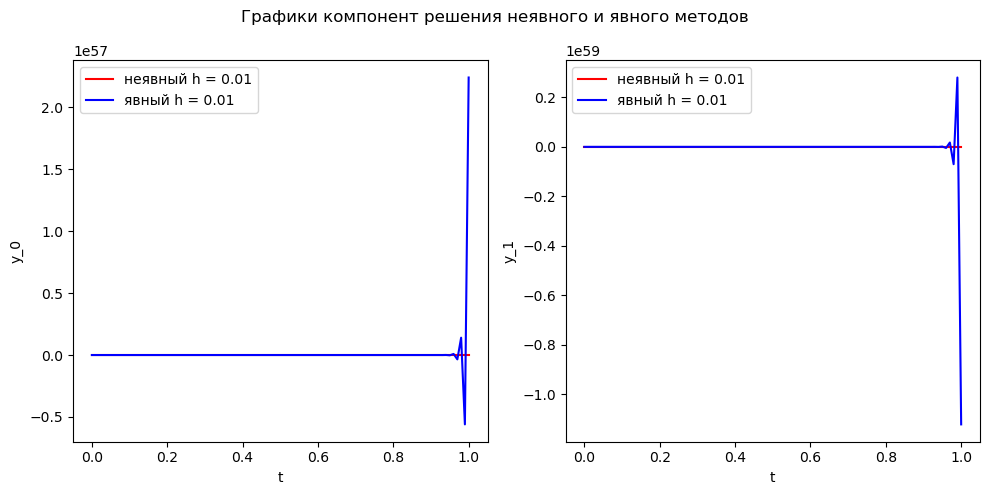

In [36]:
h_new = 0.01
t_list_new = [t0 + i * h_new for i in range(int((T-t0)/h_new)+1)]
solution_B_new_h = Eyler_matrix(B, z0, t0, T, h_new)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)  
plt.plot(t_list, impl_solution_B[:, 0],label=f'неявный h = {h}', color='r') 
plt.plot(t_list_new, solution_B_new_h[:, 0],label=f'явный h = {h_new}', color='b') 
plt.xlabel('t')
plt.ylabel('y_0')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(t_list, impl_solution_B[:, 1],label=f'неявный h = {h}', color='r') 
plt.plot(t_list_new, solution_B_new_h[:, 1],label=f'явный h = {h_new}', color='b') 
plt.xlabel('t')
plt.ylabel('y_1')
plt.legend()
plt.suptitle('Графики компонент решения неявного и явного методов')
plt.tight_layout()

plt.show()

h = 0.001

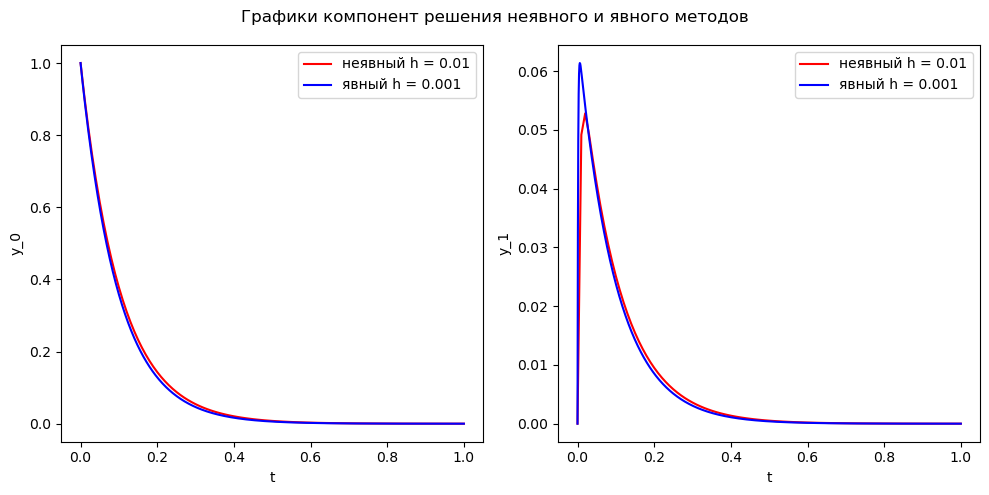

In [37]:
h_new = 0.001
t_list_new = [t0 + i * h_new for i in range(int((T-t0)/h_new)+1)]
solution_B_new_h = Eyler_matrix(B, z0, t0, T, h_new)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)  
plt.plot(t_list, impl_solution_B[:, 0],label=f'неявный h = {h}', color='r') 
plt.plot(t_list_new, solution_B_new_h[:, 0],label=f'явный h = {h_new}', color='b') 
plt.xlabel('t')
plt.ylabel('y_0')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(t_list, impl_solution_B[:, 1],label=f'неявный h = {h}', color='r') 
plt.plot(t_list_new, solution_B_new_h[:, 1],label=f'явный h = {h_new}', color='b') 
plt.xlabel('t')
plt.ylabel('y_1')
plt.legend()
plt.suptitle('Графики компонент решения неявного и явного методов')
plt.tight_layout()

plt.show()

h = max_h_B/2

In [38]:
max_h_B/2

0.001999199122423489

In [ ]:
h_new = 0.00000001
t_list_new = [t0 + i * h_new for i in range(int((T-t0)/h_new)+1)]
solution_B_new_h = Eyler_matrix(B, z0, t0, T, h_new)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)  
plt.plot(t_list, impl_solution_B[:, 0],label=f'неявный h = {h}', color='r') 
plt.plot(t_list_new, solution_B_new_h[:, 0],label=f'явный h = {h_new}', color='b') 
plt.xlabel('t')
plt.ylabel('y_0')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(t_list, impl_solution_B[:, 1],label=f'неявный h = {h}', color='r') 
plt.plot(t_list_new, solution_B_new_h[:, 1],label=f'явный h = {h_new}', color='b') 
plt.xlabel('t')
plt.ylabel('y_1')
plt.legend()
plt.suptitle('Графики компонент решения неявного и явного методов')
plt.tight_layout()

plt.show()

После подбора h* оба метода стали устойчивы.

Неявный метод использует меньшее количество узлов сетки чем явный, но сам метод сложнее, так как используютсясторонняя оптимизация.

___


    
**Вывод:**
    
В данном задании решались две задача Коши с матричными уравнениями:
    
$$Y'(t) = AY(t), Y(0) = Y_0$$
$$Z'(t) = BZ(t), Z(0) = Z_0$$
    
Были определены уравнения на которых явный метод Эйлера устойчивый:

- A - устойчивый
- B - не устойчивый
    
Были определены жесткие задачи:
    
- A - нежесткая
- B - жесткая
    
Найден шаг h при котором B устойчива: h <= 0.003998398244846978
                                                              
Подобран шаг h* при котором графики компонент решения явной задачи с h* и неявной с h = 0.01 совпадают: h* = 0.001999199122423489
                                                              
